# Credit Card Fraud Detection - Support Vector Machines


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Generate a smaller dataset for better processing

In [ ]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('/content/sample_data/creditcard.csv')

In [ ]:
# Filter fraud cases (Class = 1)
fraud_cases = df[df['Class'] == 1]

In [ ]:
fraud_cases

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
# Filter non-fraud cases (Class = 0) and randomly sample 5000 rows
non_fraud_cases = df[df['Class'] == 0].sample(n=5000, random_state=42)

In [ ]:
non_fraud_cases

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46348,42747.0,-0.590484,0.853099,1.416504,-0.421532,0.353362,-0.683382,0.670361,0.097574,-0.284073,...,-0.172126,-0.629355,0.009888,-0.018903,-0.447087,-0.054706,0.071186,0.130037,0.89,0
190577,128890.0,-0.650715,1.507848,-0.464356,-0.193506,0.840083,-0.179511,0.741093,-0.395269,0.360200,...,0.175713,0.736084,0.093480,0.673279,-1.428057,0.294175,-0.368839,0.203943,0.78,0
253493,156279.0,1.875080,1.094644,-1.737324,4.002882,1.091326,-0.323998,0.338522,0.008208,-1.257262,...,-0.397186,-1.175870,0.263150,-0.667589,-0.260184,-0.339979,-0.011355,0.004207,9.27,0
126871,78132.0,-3.120854,2.665293,0.960272,2.954251,-1.904986,2.888720,-3.553750,0.023727,0.169218,...,-1.166651,0.949434,-0.026779,-1.298061,0.508547,0.677465,0.210316,0.117562,0.00,0


In [ ]:
# Combine the two datasets
smaller_dataset = pd.concat([fraud_cases, non_fraud_cases])

In [ ]:
# Shuffle the dataset
credit_card_data = smaller_dataset.sample(frac=1, random_state=42).reset_index(drop=True)


## Dataset Info

In [ ]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,49464.0,1.066096,0.117357,-0.219046,1.364723,0.047608,-0.246092,0.147098,-0.068591,0.470636,...,-0.319663,-0.930455,-0.177932,-0.571610,0.601876,-0.483367,0.035014,0.061513,100.06,0
1,57207.0,1.300164,0.102946,-1.403677,0.185656,2.360613,3.398775,-0.269983,0.765126,-0.075124,...,-0.090099,-0.244171,-0.180229,1.018904,0.999122,-0.245222,0.011885,0.006544,1.00,0
2,125363.0,1.955785,-0.404286,-1.432686,0.107783,0.741735,1.082268,-0.294245,0.246207,0.879724,...,0.110649,0.698194,0.141015,-0.474033,-0.075610,0.829762,-0.024302,-0.075894,6.00,0
3,41694.0,1.264396,-0.067996,-0.589833,-0.426132,0.255630,-0.426491,0.299311,-0.126415,-0.172398,...,-0.385412,-1.302839,-0.043288,-0.822449,0.297202,0.788024,-0.126869,-0.016057,53.90,0
4,151645.0,-0.352354,1.106251,-0.722799,-0.336481,0.334116,-1.336329,1.089566,0.015707,-0.507217,...,0.381413,0.975271,-0.063710,0.003139,0.097993,-0.184039,-0.072176,0.003442,85.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5487,72945.0,-0.954093,1.461983,1.274446,0.686745,-0.590696,0.287138,-1.443243,-3.898211,-0.086941,...,3.560203,-2.150045,0.059802,0.335766,0.901502,0.424011,0.230868,0.190659,9.99,0
5488,149676.0,-0.033355,0.583958,0.101265,-0.804740,1.483008,-0.051579,0.948446,-0.332834,0.168886,...,-0.096861,0.028500,-0.332669,0.002561,-0.212138,0.366246,-0.437110,-0.404176,4.94,0
5489,128177.0,-12.687310,-17.098339,-0.450919,0.470647,9.995227,-5.735078,-6.959866,1.946570,0.197404,...,0.914921,-2.928272,0.551088,-0.790480,0.104596,-0.340463,0.089807,-2.413057,310.01,0
5490,83206.0,-1.464658,0.736234,2.020362,0.290575,-0.391890,-0.375046,0.182042,0.615163,-0.501685,...,0.305150,0.498202,-0.123988,0.376237,0.411137,-0.375775,-0.066239,-0.030260,60.00,0


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5492 entries, 0 to 5491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5492 non-null   float64
 1   V1      5492 non-null   float64
 2   V2      5492 non-null   float64
 3   V3      5492 non-null   float64
 4   V4      5492 non-null   float64
 5   V5      5492 non-null   float64
 6   V6      5492 non-null   float64
 7   V7      5492 non-null   float64
 8   V8      5492 non-null   float64
 9   V9      5492 non-null   float64
 10  V10     5492 non-null   float64
 11  V11     5492 non-null   float64
 12  V12     5492 non-null   float64
 13  V13     5492 non-null   float64
 14  V14     5492 non-null   float64
 15  V15     5492 non-null   float64
 16  V16     5492 non-null   float64
 17  V17     5492 non-null   float64
 18  V18     5492 non-null   float64
 19  V19     5492 non-null   float64
 20  V20     5492 non-null   float64
 21  V21     5492 non-null   float64
 22  

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,5000
1,492


In [ ]:
credit_card_data = credit_card_data.drop("Time", axis=1)


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()


In [ ]:
#standard scaling
credit_card_data['std_Amount'] = scaler.fit_transform(credit_card_data['Amount'].values.reshape (-1,1))

#removing Amount
credit_card_data = credit_card_data.drop("Amount", axis=1)

<Axes: xlabel='Class', ylabel='count'>

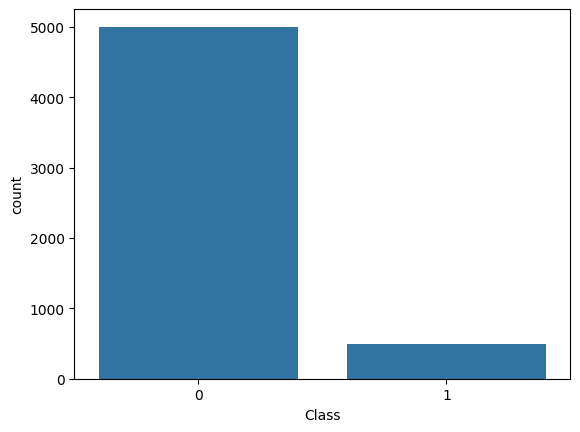

In [ ]:
sns.countplot(x="Class", data=credit_card_data)

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
cols = credit_card_data.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [ ]:
#define X and Y
X = credit_card_data[cols]
Y = credit_card_data[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

In [ ]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])


Text(0.5, 1.0, 'After')

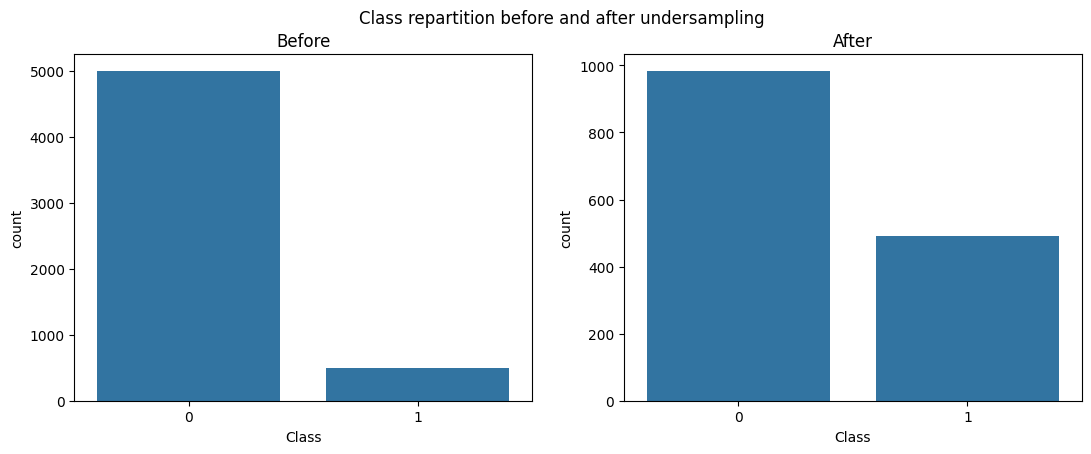

In [ ]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=credit_card_data, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

## Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve


In [ ]:
model = SVC()


In [ ]:
#train the model
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)


In [ ]:
#predictions
y_pred_svm = model2.predict(X_test)


In [ ]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))


Accuracy SVM: 0.956081081081081
Precision SVM: 1.0
Recall SVM: 0.8796296296296297
F1 Score SVM: 0.9359605911330049


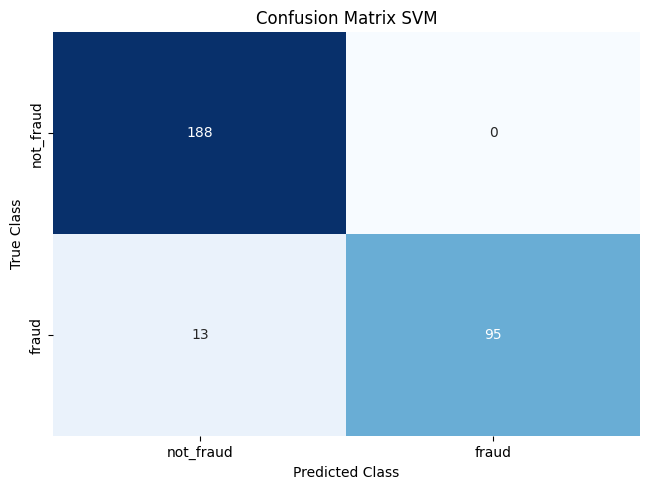

In [ ]:
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
#AUC
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)


AUC SVM : 0.990198975571316


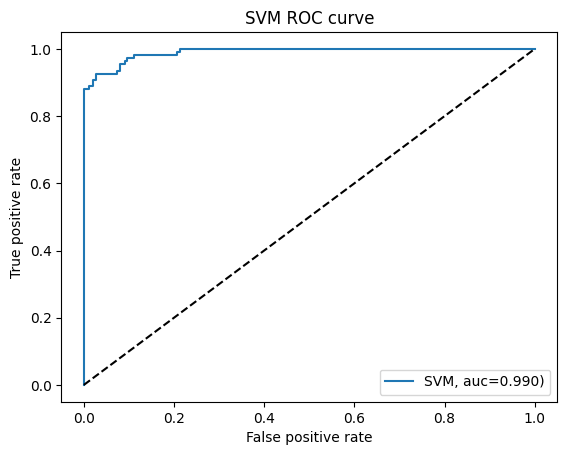

In [ ]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()


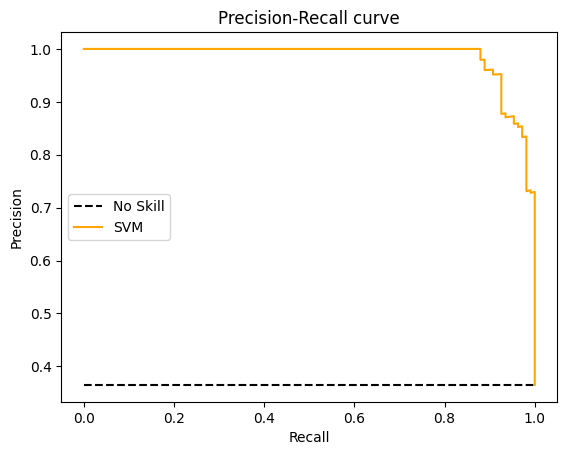

In [ ]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()
